<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Tema5_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

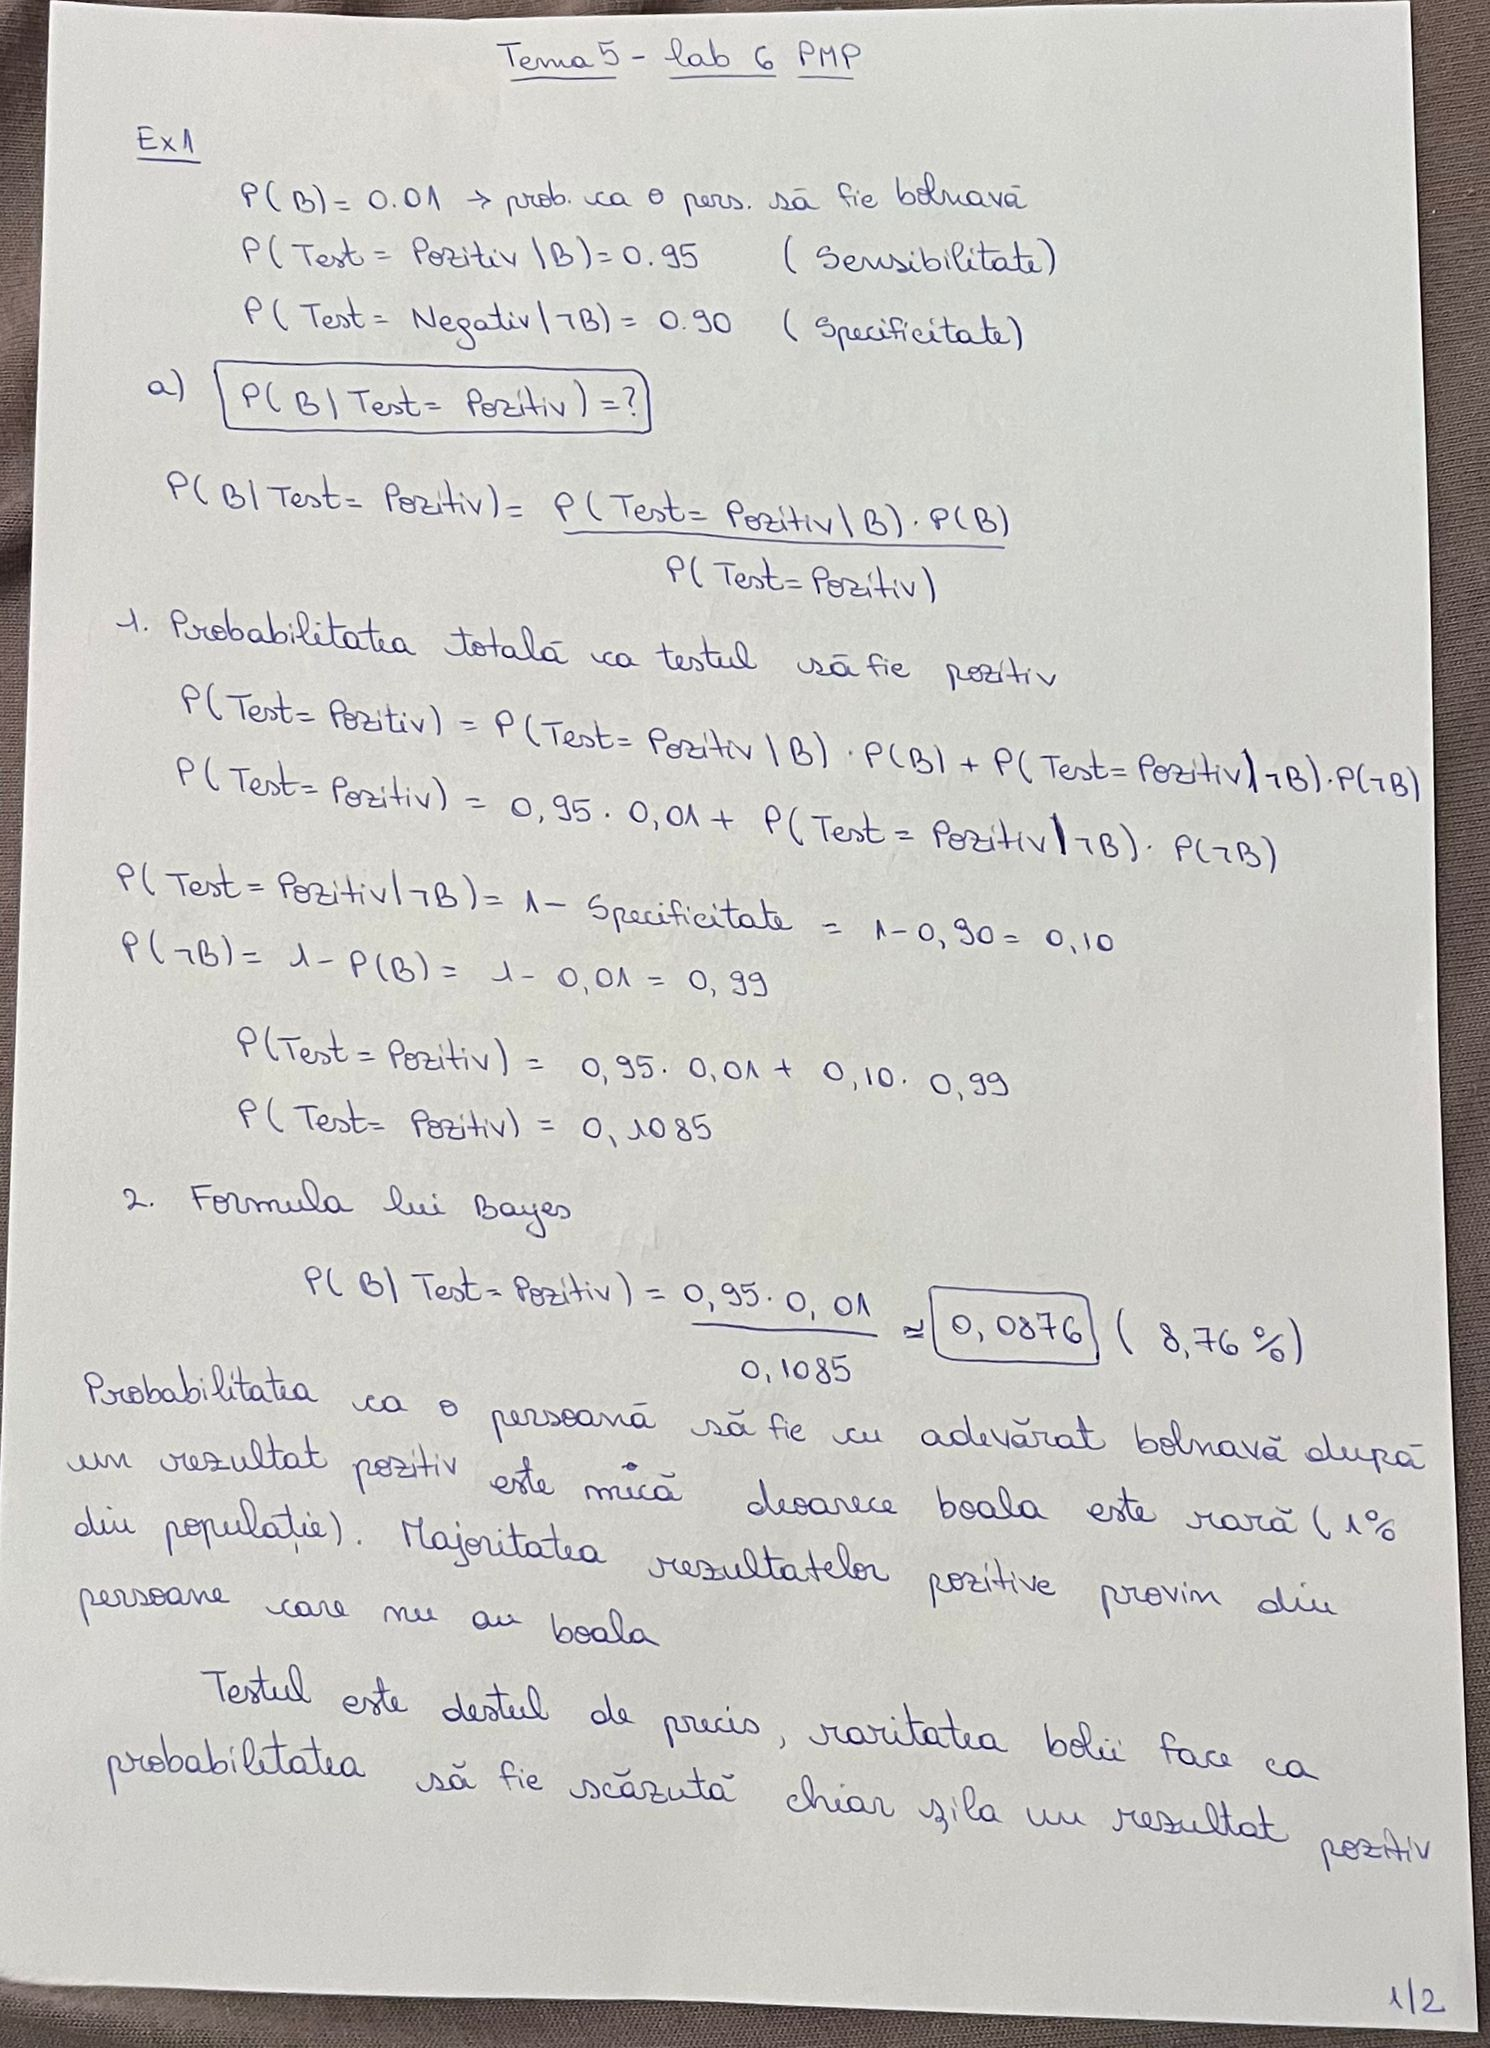

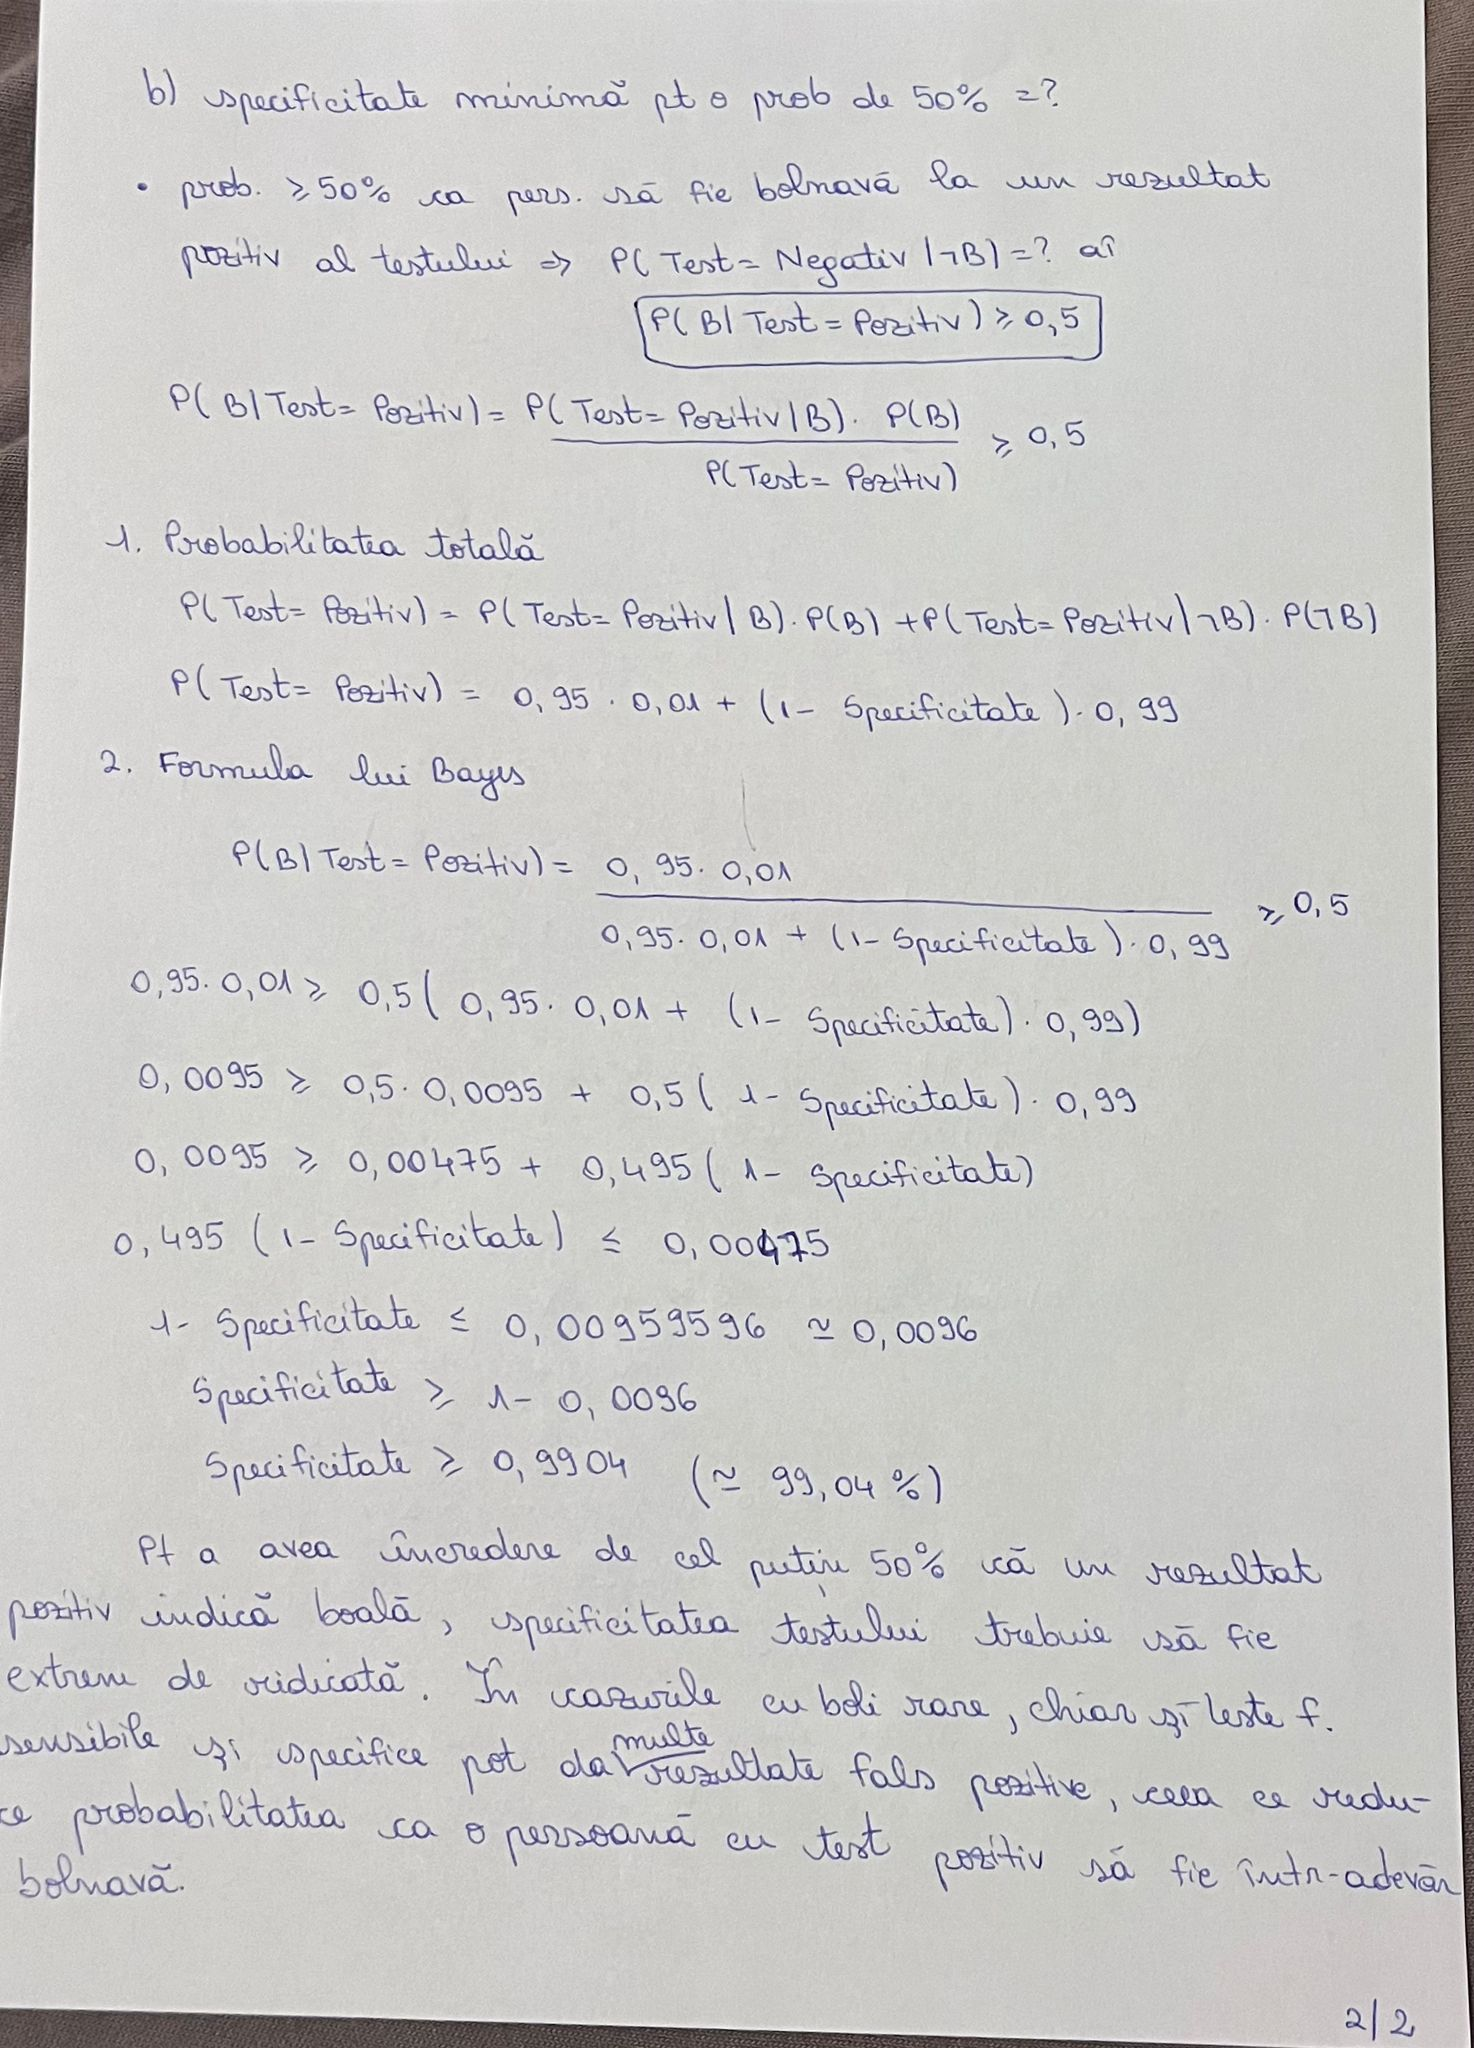

1. Definirea modelului probabilist

* Numărul de clienți care intră în restaurant pe oră urmează o distribuție Poisson cu parametrul 𝜆=20 clienți/oră. In medie 20 de clienți vor intra pe oră

* Timpul de plasare și plată a unei comenzi urmează o distribuție exponențială cu media de 2 minute. Timpul mediu de plasare și plată este de 2 minute

* Timpul de gătit al unei comenzi urmează o distribuție exponențială cu media α minute.

Scopul:

Trebuie să stabilim un model care să garanteze că toți clienții primiți într-o oră vor fi serviți într-un timp mai scurt de 15 minute, cu o probabilitate de cel puțin 95%.




In [2]:
import numpy as np

lambda_clients = 20
mean_order_time = 2
target_time = 15
best_probability = 0.95

def simulate(alpha, n_simulations=10000):
    success_count = 0
    for _ in range(n_simulations):

        n_clients = np.random.poisson(lambda_clients)

        order_times = np.random.exponential(mean_order_time, n_clients)

        cooking_times = np.random.exponential(alpha, n_clients)

        total_times = order_times + cooking_times

        if np.all(total_times < target_time):
            success_count += 1

    probability = success_count / n_simulations
    return probability

alpha_min, alpha_max = 0.1, 10
tolerance = 0.01
best_alpha = alpha_max

while alpha_max - alpha_min > tolerance:
    alpha = (alpha_max + alpha_min) / 2
    probability = simulate(alpha)

    if probability >= best_probability:
        best_alpha = alpha
        alpha_max = alpha
    else:
        alpha_min = alpha


mean_waiting_time = mean_order_time + best_alpha

best_alpha, mean_waiting_time


(10, 12)